In [7]:
import cv2
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

img_path = r'D:\GANder\T_scrap\6.png'
img = cv2.imread(img_path, 0)
img_ = cv2.imread(img_path)

In [8]:
def build_filters():
    filters = []
    ksize = 10
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
        return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
        return accum

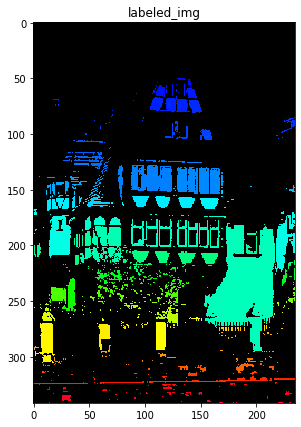

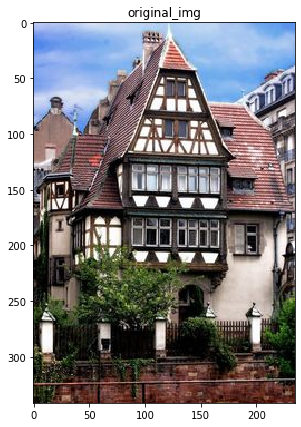

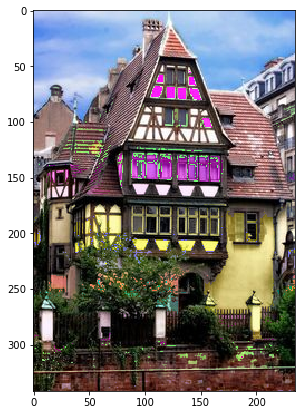

In [9]:
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
ret, labels = cv2.connectedComponents(img)

label_hue = np.uint8(128*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

labeled_img = np.array(labeled_img)

plt.figure(figsize=(7,7)),plt.imshow(labeled_img)
plt.title('labeled_img'),plt.show()

plt.figure(figsize=(7,7)),plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.title('original_img'),plt.show()

plt.figure(figsize=(7,7)),plt.imshow(labeled_img+cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.show()

<class 'numpy.ndarray'>


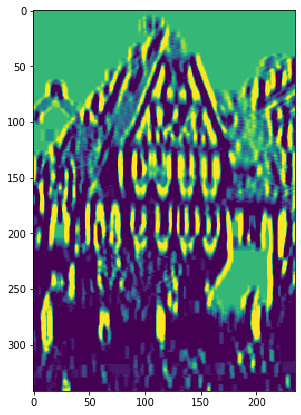

In [10]:
filters=build_filters()
res1=process(img,filters)

print(type(res1))
plt.figure(figsize=(7,7)),plt.imshow(res1)
plt.show()